TASK 1:
1.	Load the dataset (train.csv) into Python using pandas.
2.	Split the data into training and testing sets.
3.	Train a Linear Regression model to predict the Price.
4.	Evaluate the model using metrics like Mean Squared Error (MSE) and R² Score.
5.	Make predictions for the test set and compare them with the actual values.
6.	Plot actual vs. predicted prices using matplotlib for visualization.


In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
# Load the dataset
df = pd.read_csv('Iris.csv')

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nTarget variable distribution:")
print(df['Species'].value_counts())

Dataset shape: (150, 6)

First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1)

In [84]:
X_reg = df[['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # Features
y_reg = df['SepalLengthCm']  # Target (continuous)

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print("Regression dataset prepared")
print("Training set size:", X_train_reg.shape)
print("Testing set size:", X_test_reg.shape)

Regression dataset prepared
Training set size: (120, 3)
Testing set size: (30, 3)


In [85]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)

# Make predictions
lr_predictions = lr.predict(X_test_reg)
print("Linear Regression model trained successfully")
print("Sample predictions:", lr_predictions[:5])
print("Sample actual values:", y_test_reg.iloc[:5].values)

Linear Regression model trained successfully
Sample predictions: [6.36417295 5.3664344  7.15218221 6.0744307  6.30377441]
Sample actual values: [6.1 5.7 7.7 6.  6.8]


In [86]:
# Linear Regression Evaluation
lr_mse = mean_squared_error(y_test_reg, lr_predictions)
lr_r2 = r2_score(y_test_reg, lr_predictions)

print("=== Linear Regression Evaluation ===")
print(f"Mean Squared Error (MSE): {lr_mse:.4f}")
print(f"R² Score: {lr_r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(lr_mse):.4f}")

=== Linear Regression Evaluation ===
Mean Squared Error (MSE): 0.1022
R² Score: 0.8519
Root Mean Squared Error (RMSE): 0.3197


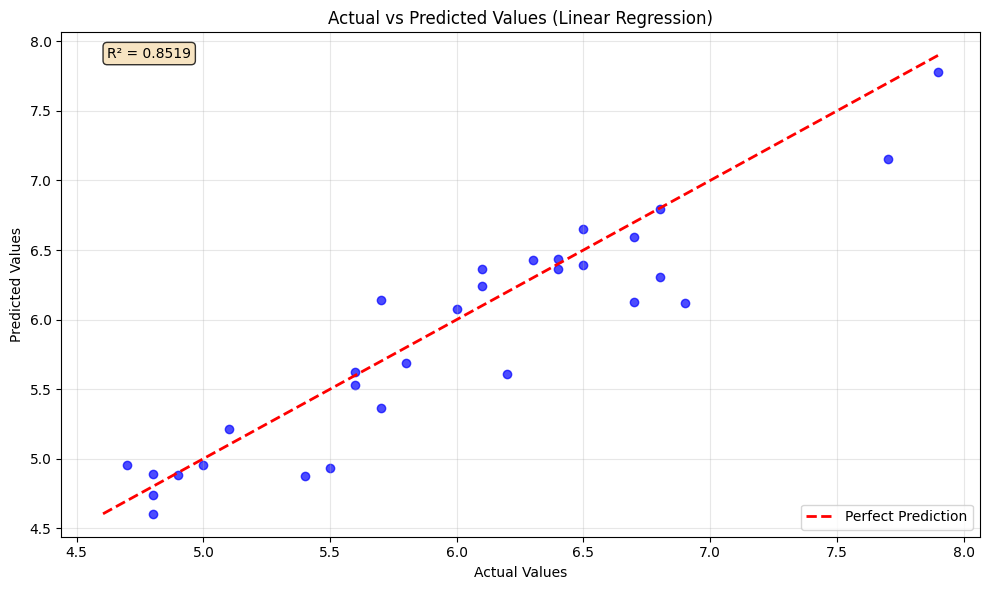

In [87]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(y_test_reg, lr_predictions, alpha=0.7, color='blue')

# Perfect prediction line
min_val = min(min(y_test_reg), min(lr_predictions))
max_val = max(max(y_test_reg), max(lr_predictions))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.legend()
plt.grid(True, alpha=0.3)

# Add R² score to the plot
plt.text(0.05, 0.95, f'R² = {lr_r2:.4f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

Task 2 :

   1. Load the dataset (USA_Housing.csv) into Python using pandas.
2.	Split the data into training and testing sets.
3.	Train a KNeighborsRegressor (KNN) model and DecisionTreeRegressor
(DecisionTree) to predict the Price.
4.	Evaluate the model using metrics like Mean Squared Error (MSE) and R² Score.
5.	Make predictions for the test set and compare them with the actual values.
6.	Plot actual vs. predicted prices using matplotlib for visualization.


In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings


In [43]:
df = pd.read_csv('USA_Housing.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset Shape: (5000, 7)

First 5 rows:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite

In [44]:

X = df.drop(['Price', 'Address'], axis=1)
y = df['Price']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:")
print(X.columns.tolist())

Features shape: (5000, 5)
Target shape: (5000,)

Feature columns:
['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']


In [45]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training set shape: (4000, 5)
Testing set shape: (1000, 5)
Training target shape: (4000,)
Testing target shape: (1000,)


In [46]:
# Train K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test)

print("KNN Model trained successfully!")
print("Sample predictions:", knn_predictions[:5])

KNN Model trained successfully!
Sample predictions: [1281884.50432266 1057563.92757695 1189747.15364882  982877.79797999
 1451100.02195789]


In [47]:
# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)

print("Decision Tree Model trained successfully!")
print("Sample predictions:", dt_predictions[:5])

Decision Tree Model trained successfully!
Sample predictions: [1158736.02089638 1199359.21381337 1397630.24945332 1127747.14637648
 1345668.45032863]


In [51]:
# KNN Metrics
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

# Decision Tree Metrics
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

# Display results
print("=== MODEL EVALUATION RESULTS ===")
print("\nK-Nearest Neighbors (KNN):")
print(f"Mean Squared Error: {knn_mse:,.2f}")
print(f"R² Score: {knn_r2:.4f}")

print("\nDecision Tree:")
print(f"Mean Squared Error: {dt_mse:,.2f}")
print(f"R² Score: {dt_r2:.4f}")

print("\n=== MODEL COMPARISON ===")
if knn_r2 > dt_r2:
    print("KNN performs better with higher R² score")
else:
    print("Decision Tree performs better with higher R² score")

=== MODEL EVALUATION RESULTS ===

K-Nearest Neighbors (KNN):
Mean Squared Error: 63,314,173,406.64
R² Score: 0.4854

Decision Tree:
Mean Squared Error: 29,233,302,180.76
R² Score: 0.7624

=== MODEL COMPARISON ===
Decision Tree performs better with higher R² score


In [53]:
# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'KNN_Predicted': knn_predictions,
    'DT_Predicted': dt_predictions
})

# Calculate differences
comparison_df['KNN_Difference'] = comparison_df['Actual'] - comparison_df['KNN_Predicted']
comparison_df['DT_Difference'] = comparison_df['Actual'] - comparison_df['DT_Predicted']

print("Sample Predictions vs Actual Values:")
print(comparison_df.head(10))

print(f"\nAverage absolute difference - KNN: {abs(comparison_df['KNN_Difference']).mean():,.2f}")
print(f"Average absolute difference - Decision Tree: {abs(comparison_df['DT_Difference']).mean():,.2f}")

Sample Predictions vs Actual Values:
         Actual  KNN_Predicted  DT_Predicted  KNN_Difference  DT_Difference
0  1.339096e+06   1.281885e+06  1.158736e+06    57211.572922  180360.056349
1  1.251794e+06   1.057564e+06  1.199359e+06   194230.251260   52434.965023
2  1.340095e+06   1.189747e+06  1.397630e+06   150347.812557  -57535.283248
3  1.431508e+06   9.828778e+05  1.127747e+06   448629.825448  303760.477051
4  1.042374e+06   1.451100e+06  1.345668e+06  -408726.497862 -303294.926233
5  1.555321e+06   1.604380e+06  1.804285e+06   -49059.806495 -248964.150042
6  1.250882e+06   6.584753e+05  1.049854e+06   592406.941778  201028.791415
7  1.039381e+06   1.010513e+06  8.943169e+05    28867.651024  145063.829852
8  8.324752e+05   8.436979e+05  8.712353e+05   -11222.665474  -38760.123344
9  1.420648e+06   1.519556e+06  1.333093e+06   -98907.842950   87555.539176

Average absolute difference - KNN: 203,987.47
Average absolute difference - Decision Tree: 133,996.53


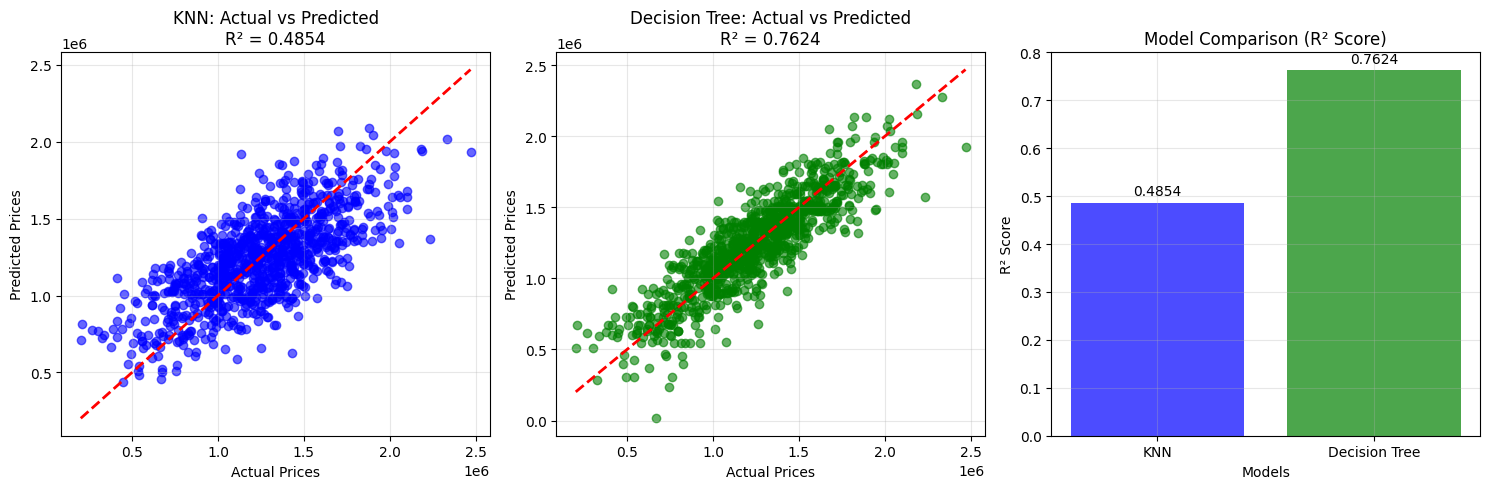

In [54]:
# Create visualization plots
plt.figure(figsize=(15, 5))

# KNN: Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_test, knn_predictions, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'KNN: Actual vs Predicted\nR² = {knn_r2:.4f}')
plt.grid(True, alpha=0.3)

# Decision Tree: Actual vs Predicted
plt.subplot(1, 3, 2)
plt.scatter(y_test, dt_predictions, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Decision Tree: Actual vs Predicted\nR² = {dt_r2:.4f}')
plt.grid(True, alpha=0.3)

# Model Comparison
plt.subplot(1, 3, 3)
models = ['KNN', 'Decision Tree']
r2_scores = [knn_r2, dt_r2]
mse_scores = [knn_mse, dt_mse]

x = np.arange(len(models))
plt.bar(x, r2_scores, alpha=0.7, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Model Comparison (R² Score)')
plt.xticks(x, models)
plt.grid(True, alpha=0.3)

for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Classification
TASK 1
1.	Load the dataset (Iris.csv) into Python using pandas.
2.	Split the data into training and testing sets.
3.	Train a KNeighborsClassifier (KNN) and DecisionTreeClassifier
(Decision Tree) to predict the Species.
4.	Evaluate the model using metrics like Accuracy, Confusion Matrix, Precision, Recall, F1-score


In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Load the Iris dataset
df = pd.read_csv('Iris.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSpecies distribution:")
print(df['Species'].value_counts())

Dataset Shape: (150, 6)

First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1)

In [57]:
# Prepare features (X) and target (y)
X = df.drop(['Species'], axis=1)  # Features
y = df['Species']  # Target

# Remove any non-numeric columns if present (like Id column)
X = X.select_dtypes(include=[np.number])

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeatures:")
print(X.columns.tolist())
print("\nUnique classes:")
print(y.unique())

Features shape: (150, 5)
Target shape: (150,)

Features:
['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

Unique classes:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [58]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

print("\nClass distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in testing set:")
print(y_test.value_counts())

Training set shape: (120, 5)
Testing set shape: (30, 5)
Training target shape: (120,)
Testing target shape: (30,)

Class distribution in training set:
Species
Iris-setosa        40
Iris-virginica     40
Iris-versicolor    40
Name: count, dtype: int64

Class distribution in testing set:
Species
Iris-setosa        10
Iris-virginica     10
Iris-versicolor    10
Name: count, dtype: int64


In [59]:
# Create and train KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

print("KNN Classifier trained successfully!")

KNN Classifier trained successfully!


In [60]:
# Create and train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully!")

Decision Tree Classifier trained successfully!


In [61]:
# Make predictions with both models
knn_predictions = knn_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)

print("Predictions made successfully!")
print("KNN Predictions shape:", knn_predictions.shape)
print("Decision Tree Predictions shape:", dt_predictions.shape)

Predictions made successfully!
KNN Predictions shape: (30,)
Decision Tree Predictions shape: (30,)


In [62]:
# Calculate metrics for KNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')

# Calculate metrics for Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

print("=== MODEL EVALUATION RESULTS ===")
print(f"\nKNN Classifier:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1-Score: {knn_f1:.4f}")

print(f"\nDecision Tree Classifier:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")

=== MODEL EVALUATION RESULTS ===

KNN Classifier:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Decision Tree Classifier:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [63]:
print("=== DETAILED CLASSIFICATION REPORTS ===")
print("\nKNN Classifier Report:")
print(classification_report(y_test, knn_predictions))

print("\nDecision Tree Classifier Report:")
print(classification_report(y_test, dt_predictions))

=== DETAILED CLASSIFICATION REPORTS ===

KNN Classifier Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Decision Tree Classifier Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



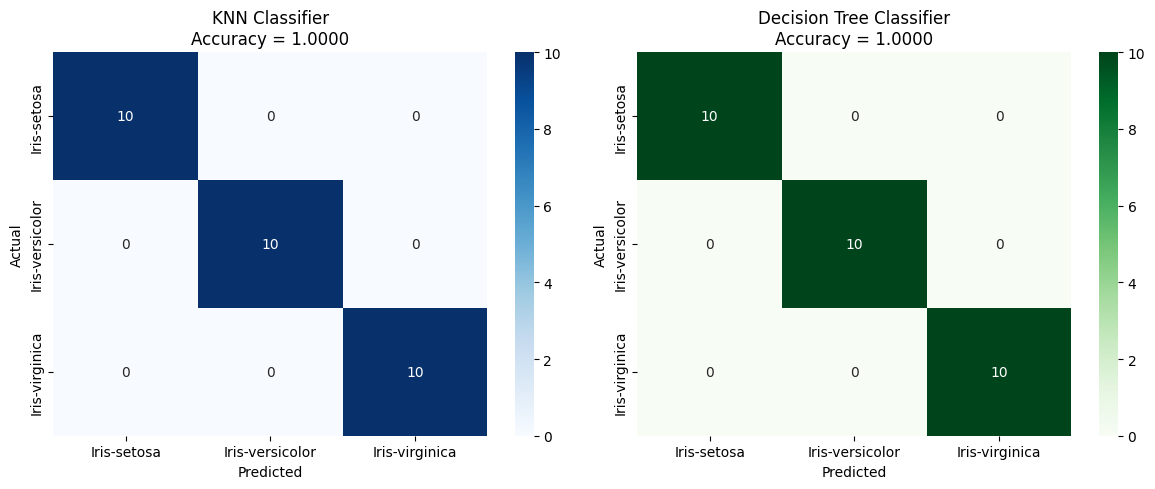

Confusion Matrix - KNN:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Confusion Matrix - Decision Tree:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [64]:
# Create confusion matrices
knn_cm = confusion_matrix(y_test, knn_predictions)
dt_cm = confusion_matrix(y_test, dt_predictions)

# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# KNN Confusion Matrix
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
ax1.set_title(f'KNN Classifier\nAccuracy = {knn_accuracy:.4f}')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Decision Tree Confusion Matrix
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Greens', ax=ax2,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
ax2.set_title(f'Decision Tree Classifier\nAccuracy = {dt_accuracy:.4f}')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

print("Confusion Matrix - KNN:")
print(knn_cm)
print("\nConfusion Matrix - Decision Tree:")
print(dt_cm)

Pros and Cons of DecisionTreeClassifier
Pros of Decision Trees: Highly interpretable and easy to visualize, handles both numerical and categorical features without preprocessing, automatically performs feature selection, robust to outliers, handles missing values well, requires minimal data preparation, and can capture non-linear relationships and feature interactions naturally.Cons of Decision Trees: Prone to overfitting, especially with deep trees, unstable , biased toward features with more levels, can create overly complex trees that don't generalize well, and may not perform optimally with linear relationships. Single trees often have lower predictive accuracy compared to ensemble methods.

Performance Comparison and Best Practices
For the Iris dataset specifically, both algorithms typically perform well due to the dataset's characteristics. KNN often achieves excellent results because the Iris species form distinct clusters in the feature space, making the nearest neighbor approach highly effective. Decision trees also perform well because they can easily separate the species based on simple feature thresholds. However, KNN might have a slight edge due to the natural clustering of iris species.

In practice, consider using KNN adequate computational resources, relatively low-dimensional data, and when local similarity is meaningful. Choose Decision Trees when interpretability is crucial, dealing with mixed data types, or when you need to understand the decision-making process. For production systems, consider that KNN requires storing training data and has higher prediction latency, while Decision Trees offer faster predictions once trained.


